In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

# Part A - i)

In [3]:
a = np.array([4,0])
b = np.array([3,4])
c = np.array([0,1])

In [4]:
def area_triangle(A, B, C):
    area = 1/2 * np.abs((A[0]*(B[1]-C[1]) + B[0]*(C[1]-A[1]) + C[0]*(A[1]-B[1])))
    return area

In [5]:
original = area_triangle([4,0], [3,4], [0,1]); 

In [6]:
original

7.5

# ii. part a, b, and c

In [7]:
n_inputs = 1000; points_list = [];
def coordinates(a, b, c, n_inputs, flag):
    x_coordinates = []
    y_coordinates = []

    vertice = area_triangle(a,b,c)
    
    for i in range(n_inputs):
        if flag == 1:
            r1 = np.random.uniform(0,1); r2 = np.random.uniform(0,1); r3 = np.random.uniform(0,1);
            alpha = r1 / (r1+r2+r3); beta = r2 / (r1+r2+r3); gamma = r3 / (r1+r2+r3)
        elif flag == 2:
            r1 = np.random.uniform(0,1); r2 = np.random.uniform(0,1); 
            if r1 + r2 > 1:
                r1 = 1 - r1
                r2 = 1 - r2
            alpha = 1 - r1 - r2; beta = r1; gamma = r2
        elif flag == 3:
            r1 = np.random.uniform(0,1); r2 = np.random.uniform(0,1); 
            alpha = 1 - np.sqrt(r1); beta = np.sqrt(r1)*r2; gamma = np.sqrt(r1) * (1-r2)
            
        points = (alpha)*np.array(a) + (beta)*np.array(b) + (gamma)*np.array(c) 
        points = list(points)
        points_list.append(points)
        xcoord = points[0]; ycoord = points[1]
        x_coordinates.append(xcoord)
        y_coordinates.append(ycoord)  
    return x_coordinates, y_coordinates
 
            

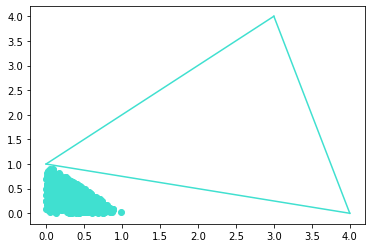

In [30]:
#x_coordinates, y_coordinates =coordinates([4,0], [3,4], [0,1], 1000, 1)
x_coordinates, y_coordinates =coordinates([0,0], [1,0], [0,1], 1000, 1) #final exam example

plt.scatter(x_coordinates, y_coordinates, color = 'turquoise', marker = 'o')
plt.plot([a[0],b[0]], [a[1],b[1]], color = 'turquoise')
plt.plot([b[0],c[0]], [b[1],c[1]], color = 'turquoise')
plt.plot([c[0], a[0]], [c[1],a[1]], color = 'turquoise') 

# iii)

Text(0.5, 1.0, 'Flag 3')

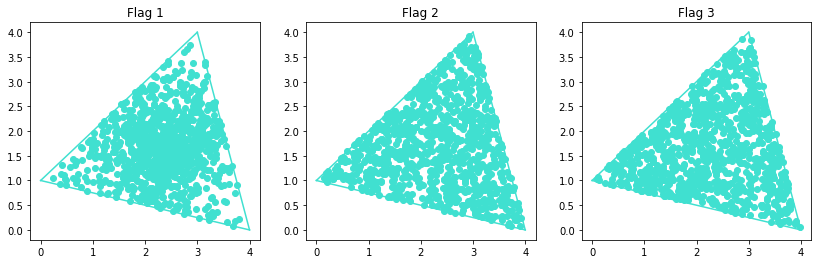

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
x_coordinates, y_coordinates= coordinates([4,0], [3,4], [0,1], 1000, 1)
plt.scatter(x_coordinates, y_coordinates, color = 'turquoise', marker = 'o')
plt.plot([a[0],b[0]], [a[1],b[1]], color = 'turquoise')
plt.plot([b[0],c[0]], [b[1],c[1]], color = 'turquoise')
plt.plot([c[0], a[0]], [c[1],a[1]], color = 'turquoise') 
plt.title("Flag 1")
plt.subplot(1,3,2)
x_coordinates, y_coordinates=coordinates([4,0], [3,4], [0,1], 1000, 2)
plt.scatter(x_coordinates, y_coordinates, color = 'turquoise', marker = 'o')
plt.plot([a[0],b[0]], [a[1],b[1]], color = 'turquoise')
plt.plot([b[0],c[0]], [b[1],c[1]], color = 'turquoise')
plt.plot([c[0], a[0]], [c[1],a[1]], color = 'turquoise') 
plt.title("Flag 2")
plt.subplot(1,3,3)
x_coordinates, y_coordinates=coordinates([4,0], [3,4], [0,1], 1000, 3)
plt.scatter(x_coordinates, y_coordinates, color = 'turquoise', marker = 'o')
plt.plot([a[0],b[0]], [a[1],b[1]], color = 'turquoise')
plt.plot([b[0],c[0]], [b[1],c[1]], color = 'turquoise')
plt.plot([c[0], a[0]], [c[1],a[1]], color = 'turquoise') 
plt.title("Flag 3")

Observation: Flag 1's points are all being centered plotted at the center where as Flag 2 and 3 points are being plotted around the area of the triangle

In [31]:
def f(x,y):
    #return x**2+y**2
    return x**y #Terrell final exam example

In [40]:
def Monte_Carlo(T, N, flag):
    #x_coordinates, y_coordinates = coordinates([4,0], [3,4], [0,1], N, flag) #final exam example
    x_coordinates, y_coordinates = coordinates([0,0], [1,0], [0,1], N, flag)

    integral =T/N * np.sum(f(np.array(x_coordinates), np.array(y_coordinates)))
    
    return integral

In [41]:
#Monte_Carlo(original, 262144, 2)
Monte_Carlo(0.5, 262144, 2)

0.32559344219974884

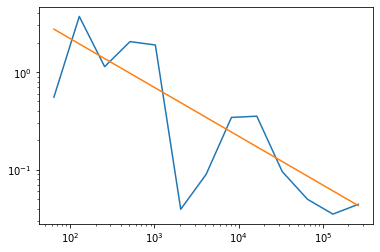

In [13]:
# estimate = Monte_Carlo(original, 100000, 2)
# error = np.abs(estimate-72.5)
error_l = [] 
N_l = []
for i in range(6, 19):
    N = 2**i
    N_l.append(N)
    estimate = Monte_Carlo(original, N, 2)
    error = np.abs(estimate-72.5)
    error_l.append(error)
plt.loglog(N_l, error_l)
plt.loglog(N_l, 22*(1/(np.sqrt(N_l))))


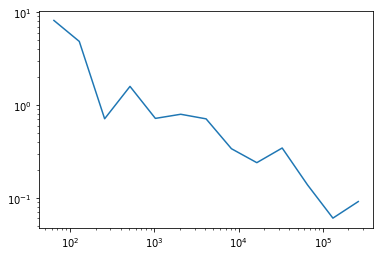

In [14]:
error_l = [] 
N_l = []
for i in range(6, 19):
    N = 2**i
    N_l.append(N)
    estimate = Monte_Carlo(original, N, 3)
    error = np.abs(estimate-72.5)
    error_l.append(error)
plt.loglog(N_l, error_l)
#plt.loglog(error_l, (1/(np.sqrt(error_l))))

#This plot converges

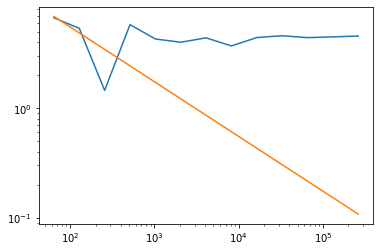

In [15]:
error_l = [] 
N_l = []
for i in range(6, 19):
    N = 2**i
    N_l.append(N)
    estimate = Monte_Carlo(original, N, 1)
    error = np.abs(estimate-72.5)
    error_l.append(error)
plt.loglog(N_l, error_l)
plt.loglog(N_l,  55* (1/(np.sqrt(N_l))))

#This plot converges

# Question 2

In [16]:
def quadrature(v1, v2, v3, flag):
    plt.plot([v1[0],v2[0]], [v1[1],v2[1]],  color = 'turquoise')
    plt.plot([v2[0],v3[0]], [v2[1],v3[1]],  color = 'turquoise')
    plt.plot([v3[0], v1[0]], [v3[1],v1[1]],  color = 'turquoise')
    
    if flag == 1:
        fvec_list = []
        quadpoints_list = []
        nn_list = []
        x = np.array([1, 0, 0])
        y = np.array([0, 1, 0])
        w = np.array([1/3, 1/3, 1/3])
        area = original    
        
    elif flag == 2:
        fvec_list = []
        quadpoints_list = []
        alpha = 0.816847572980459
        beta = 0.091576213509771
        gamma = 0.108103018168070
        sigma = 0.445948490915965
        u = 0.109951743655322
        v = 0.223381589678011
        
        x = np.array([alpha, beta, beta, gamma, sigma, sigma])
        y = np.array([beta, alpha, beta, sigma, gamma, sigma])
        w = np.array([u, u, u, v, v,v ])
        area = original
        
    quads = v1* x +  v2* y + v3 * (1 - x - y)
    plt.scatter(quads[0], quads[1])
    plt.show()
    return quads, w
        
        

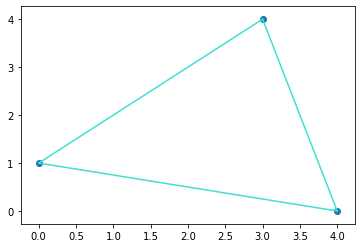

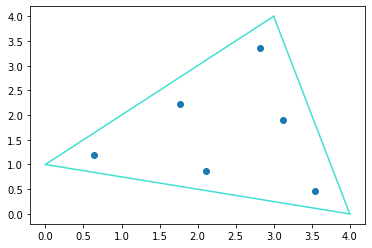

In [17]:
quads1 = quadrature(np.array([[4,0]]).T, np.array([[3,4]]).T, np.array([[0,1]]).T, 1)
quads2 = quadrature(np.array([[4,0]]).T, np.array([[3,4]]).T, np.array([[0,1]]).T, 2)

In [19]:
quads1

(array([[4, 3, 0],
        [0, 4, 1]]), array([0.33333333, 0.33333333, 0.33333333]))

In [20]:
quads1[1:]

(array([0.33333333, 0.33333333, 0.33333333]),)

In [18]:
integral_quads1 = original * np.sum(quads1[1:] * f(quads1[0][1], quads1[0][0]))

In [19]:
integral_quads1

104.99999999999999

In [20]:
quads2

(array([[3.54211893, 2.81684757, 0.64103349, 1.77025755, 2.10810302,
         3.12163944],
        [0.45788107, 3.35896651, 1.18315243, 2.22974245, 0.87836056,
         1.89189698]]),
 array([0.10995174, 0.10995174, 0.10995174, 0.22338159, 0.22338159,
        0.22338159]))

In [21]:
integral_quads2 = original * np.sum(quads2[1:] * f(quads2[0][1], quads2[0][0]))

In [22]:
integral_quads2

72.49999999999999